# Causality of Economic Uncertainty on Bitcoin Prices
_School of Information Technology & School of Business_ <br>
_Monash University Malaysia_<br>
(c) Copyright 2020, Ian Tan & Poon Wai Ching

For Cross Mapping<br>
https://github.com/nickc1/skccm

Good tutorial<br>
https://notebook.community/NickC1/skCCM/scripts/skCCM_examples

Steps

- Read dataset (BTC, China Economic, US Economic)
- Have new dataset Global EPU, Singapore EPU, UK EPU and US EPU (https://www.policyuncertainty.com/index.html)
- Wrangle and merge dataset
- Conduct Convergent Cross Mapping (sklearn)

In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

# Read datasets

In [2]:
globalDf = pd.read_csv("data/Global_Policy_Uncertainty_Data-Since1997.csv", encoding="latin-1")
btcDf = pd.read_csv("data/BTC-Monthly-Since2014.csv")
chinaDf = pd.read_csv("data/China-TPU-Monthly-Since2000.csv", encoding="latin-1") # due to some 0x9x characters
usDf = pd.read_csv("data/US_Policy_Index-Monthly-Since1985.csv")

## Wrangle Global EPU dataset

In [3]:
globalDf.head()

,Year,Month,GEPU_current,GEPU_ppp
0,1997,1.0,74.250916,76.827372
1,1997,2.0,77.455858,79.145625
2,1997,3.0,66.761655,64.889262
3,1997,4.0,71.868261,73.164048
4,1997,5.0,69.901362,70.204210


In [4]:
globalDf.dtypes

Year             object
Month           float64
GEPU_current    float64
GEPU_ppp        float64
dtype: object

In [5]:
globalDf = globalDf.dropna()

In [6]:
globalDf.tail()

,Year,Month,GEPU_current,GEPU_ppp
280,2020,5.0,412.826586,423.968339
281,2020,6.0,313.741755,333.653920
282,2020,7.0,337.384424,340.895162
283,2020,8.0,285.883907,306.856490
284,2020,9.0,286.915497,298.280919


In [7]:
globalDf['Year'] = globalDf['Year'].astype('int')

In [8]:
globalDf.drop(globalDf[globalDf['Year'] < 2014].index, inplace=True)

In [9]:
globalDf['Year'] = globalDf['Year'].astype('int')

In [10]:
globalDf['Month'] = globalDf['Month'].astype('int')

In [11]:
globalDf.head()

,Year,Month,GEPU_current,GEPU_ppp
204,2014,1,107.324807,108.767217
205,2014,2,94.643427,92.150604
206,2014,3,109.436900,107.244238
207,2014,4,97.775491,101.434120
208,2014,5,100.257487,102.025873


In [12]:
len(globalDf)

81

## Wrangle BTC dataset

In [13]:
btcDf.head()

,Date (based on 1st of Month),Open,High,Low,Close,Volume
0,Sep-2014,465.864014,468.174011,372.239990,386.944000,4.108810e+08
1,Oct-2014,387.427002,411.697998,289.295990,338.321014,9.029944e+08
2,Nov-2014,338.649994,457.092987,320.626007,378.046997,6.597334e+08
3,Dec-2014,378.248993,384.037994,304.231995,320.192993,5.531023e+08
4,Jan-2015,320.434998,320.434998,171.509995,217.464005,1.098812e+09


In [14]:
btcDf.dtypes

Date (based on 1st of Month)     object
Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
dtype: object

In [15]:
btcDf['Year'] = pd.DatetimeIndex(btcDf['Date (based on 1st of Month)']).year
btcDf['Month'] = pd.DatetimeIndex(btcDf['Date (based on 1st of Month)']).month
btcDf.head()

,Date (based on 1st of Month),Open,High,Low,Close,Volume,Year,Month
0,Sep-2014,465.864014,468.174011,372.239990,386.944000,4.108810e+08,2014,9
1,Oct-2014,387.427002,411.697998,289.295990,338.321014,9.029944e+08,2014,10
2,Nov-2014,338.649994,457.092987,320.626007,378.046997,6.597334e+08,2014,11
3,Dec-2014,378.248993,384.037994,304.231995,320.192993,5.531023e+08,2014,12
4,Jan-2015,320.434998,320.434998,171.509995,217.464005,1.098812e+09,2015,1


In [16]:
# Estatics only, I just wanted the year and month in front
cols = btcDf.columns.tolist()
cols = cols[-1:] + cols[:-1]; cols = cols[-1:] + cols[:-1]
btcDf = btcDf[cols]
# Delete the not needed column
del btcDf['Date (based on 1st of Month)']

In [17]:
btcDf.reset_index()
btcDf.head()

,Year,Month,Open,High,Low,Close,Volume
0,2014,9,465.864014,468.174011,372.239990,386.944000,4.108810e+08
1,2014,10,387.427002,411.697998,289.295990,338.321014,9.029944e+08
2,2014,11,338.649994,457.092987,320.626007,378.046997,6.597334e+08
3,2014,12,378.248993,384.037994,304.231995,320.192993,5.531023e+08
4,2015,1,320.434998,320.434998,171.509995,217.464005,1.098812e+09


In [18]:
btcDf.tail()

,Year,Month,Open,High,Low,Close,Volume
67,2020,4,6437.319336,9440.650391,6202.373535,8658.553711,1.156130e+12
68,2020,5,8672.782227,9996.743164,8374.323242,9461.058594,1.286370e+12
69,2020,6,9463.605469,10199.565430,8975.525391,9137.993164,6.509130e+11
70,2020,7,9145.985352,11415.864260,8977.015625,11323.466800,5.458130e+11
71,2020,8,11322.570310,12034.144530,11012.415040,11675.739260,1.797630e+11


In [19]:
len(btcDf)

72

## Wrangle China dataset

In [20]:
chinaDf.head()

,year,month,TPU,Unnamed: 3,Unnamed: 4,"Source: ''Economic Policy Uncertainty in China Since 1949: The View from Mainland Newspapers, by Steven J. Davis, Dingqian Liu and Xuguang S. Sheng, 2019."
0,2000,1,38.2,NaN,NaN,These data can be used freely with attribution...
1,2000,2,14.7,NaN,NaN,NaN
2,2000,3,8.9,NaN,NaN,NaN
3,2000,4,8.9,NaN,NaN,NaN
4,2000,5,0.0,NaN,NaN,NaN


In [21]:
# Reformat by dropping last 3 columns (or rather, just take the first 3 columns)
chinaDf = chinaDf.loc[:,['year','month','TPU']]

In [22]:
chinaDf.columns = ['Year','Month','TPU']

In [23]:
chinaDf.drop(chinaDf[chinaDf['Year'] < 2014].index, inplace=True)

In [24]:
chinaDf.reset_index(drop = True, inplace = True)
chinaDf.head()

,Year,Month,TPU
0,2014,1,39.0
1,2014,2,24.0
2,2014,3,99.9
3,2014,4,67.9
4,2014,5,15.7


In [25]:
len(chinaDf)

79

In [26]:
chinaDf.tail()

,Year,Month,TPU
74,2020,3,105.9
75,2020,4,193.1
76,2020,5,547.3
77,2020,6,473.9
78,2020,7,340.8


## Wrangle US dataset

In [27]:
usDf.head()

,Year,Month,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration
0,1985,1.0,103.748802,94.195557,204.033661,13.494806
1,1985,2.0,78.313202,131.445221,136.022430,13.494806
2,1985,3.0,100.761482,131.683533,136.022430,13.494806
3,1985,4.0,84.778870,131.495529,136.022430,13.494806
4,1985,5.0,98.053658,139.016907,170.028061,13.494806


In [28]:
usDf.dtypes

Year                               object
Month                             float64
News_Based_Policy_Uncert_Index    float64
FedStateLocal_Ex_disagreement     float64
CPI_disagreement                  float64
Tax_expiration                    float64
dtype: object

In [29]:
usDf['Year'] = pd.to_numeric(usDf['Year'], errors='coerce')

In [30]:
usDf.drop(usDf[usDf['Year'] < 2014].index, inplace=True)

In [31]:
usDf = usDf.dropna()

In [32]:
usDf['Year'] = usDf['Year'].astype('int'); usDf['Month'] = usDf['Month'].astype('int')

In [33]:
usDf.dtypes

Year                                int32
Month                               int32
News_Based_Policy_Uncert_Index    float64
FedStateLocal_Ex_disagreement     float64
CPI_disagreement                  float64
Tax_expiration                    float64
dtype: object

In [34]:
usDf.reset_index(drop = True, inplace = True)
usDf.head()

,Year,Month,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration
0,2014,1,107.705139,83.794785,71.942268,18.917648
1,2014,2,93.369286,87.217278,85.585320,18.917648
2,2014,3,101.018730,87.261520,85.585320,18.917648
3,2014,4,96.993431,87.300034,85.585320,18.917648
4,2014,5,102.015045,91.901459,68.011215,18.917648


In [35]:
len(usDf)

79

In [36]:
usDf.tail()

,Year,Month,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration
74,2020,3,425.779205,69.506531,72.472755,282.284149
75,2020,4,400.944733,69.506531,72.472755,282.284149
76,2020,5,503.963348,171.697784,98.969925,282.284149
77,2020,6,300.400940,171.697784,98.969925,282.284149
78,2020,7,409.611176,171.697784,98.969925,282.284149


## Merge Data

As the BTC dataset only starts from September 2014 and the China and US dataset is only up to July 2020, we will need to filter them before combining all of them together in one dataframe.


In [37]:
globalDf = globalDf[ ~((globalDf['Year'] == 2020) & (globalDf['Month'] > 7)) ]
globalDf = globalDf[ ~((globalDf['Year'] == 2014) & (globalDf['Month'] < 9)) ]

In [38]:
btcDf = btcDf[ ~((btcDf['Year'] == 2020) & (btcDf['Month'] > 7)) ]
chinaDf = chinaDf[ ~((chinaDf['Year'] == 2014) & (chinaDf['Month'] < 9)) ]
usDf = usDf[ ~((usDf['Year'] == 2014) & (usDf['Month'] < 9)) ]

In [39]:
if (len(btcDf) == len(chinaDf) == len(usDf)):
    print("Data frames ready to merge")

Data frames ready to merge


In [40]:
allDf = btcDf.merge(globalDf.merge(chinaDf).merge(usDf))

In [41]:
allDf.head()

,Year,Month,Open,High,Low,Close,Volume,GEPU_current,GEPU_ppp,TPU,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration
0,2014,9,465.864014,468.174011,372.239990,386.944000,4.108810e+08,119.004523,123.848461,66.0,86.216591,90.738510,81.613464,18.917648
1,2014,10,387.427002,411.697998,289.295990,338.321014,9.029944e+08,115.001499,117.841802,47.9,113.334579,90.757492,81.613464,18.917648
2,2014,11,338.649994,457.092987,320.626007,378.046997,6.597334e+08,109.575411,115.329683,108.4,93.185951,91.726883,81.613464,18.917648
3,2014,12,378.248993,384.037994,304.231995,320.192993,5.531023e+08,107.930762,109.408125,18.7,87.415321,91.753418,81.613464,18.917648
4,2015,1,320.434998,320.434998,171.509995,217.464005,1.098812e+09,131.733360,138.663842,22.8,120.544228,91.764519,81.613464,620.767761


In [42]:
# Let's save this for a bit
allDf.to_csv('data/allData.csv')

Just for BTC vs Global EPU

In [43]:
smallDf = btcDf.merge(globalDf)

In [44]:
smallDf.head()

,Year,Month,Open,High,Low,Close,Volume,GEPU_current,GEPU_ppp
0,2014,9,465.864014,468.174011,372.239990,386.944000,4.108810e+08,119.004523,123.848461
1,2014,10,387.427002,411.697998,289.295990,338.321014,9.029944e+08,115.001499,117.841802
2,2014,11,338.649994,457.092987,320.626007,378.046997,6.597334e+08,109.575411,115.329683
3,2014,12,378.248993,384.037994,304.231995,320.192993,5.531023e+08,107.930762,109.408125
4,2015,1,320.434998,320.434998,171.509995,217.464005,1.098812e+09,131.733360,138.663842


In [45]:
# No NaN values, if there are, best practise is to pad it

Just to get some intuition on the type of data we are dealing with, we do a normality test (distribution).

<span style="color:red">Do this later .. impatient now to look at Granger</span>

We use only the BTC closing price.

In [46]:
gDf = allDf.loc[:,['Close', 'GEPU_current', 'TPU', 'News_Based_Policy_Uncert_Index', 'FedStateLocal_Ex_disagreement', 'CPI_disagreement', 'Tax_expiration']]
gDf.columns = ['BTC','GlobalEPU','TPU','News', 'FedState', 'CPI','Tax']
gDf.head()

,BTC,GlobalEPU,TPU,News,FedState,CPI,Tax
0,386.944000,119.004523,66.0,86.216591,90.738510,81.613464,18.917648
1,338.321014,115.001499,47.9,113.334579,90.757492,81.613464,18.917648
2,378.046997,109.575411,108.4,93.185951,91.726883,81.613464,18.917648
3,320.192993,107.930762,18.7,87.415321,91.753418,81.613464,18.917648
4,217.464005,131.733360,22.8,120.544228,91.764519,81.613464,620.767761


Let's have a look at the indices that we are interested in, BTC, GlobalEPU, China TPU and US CPI

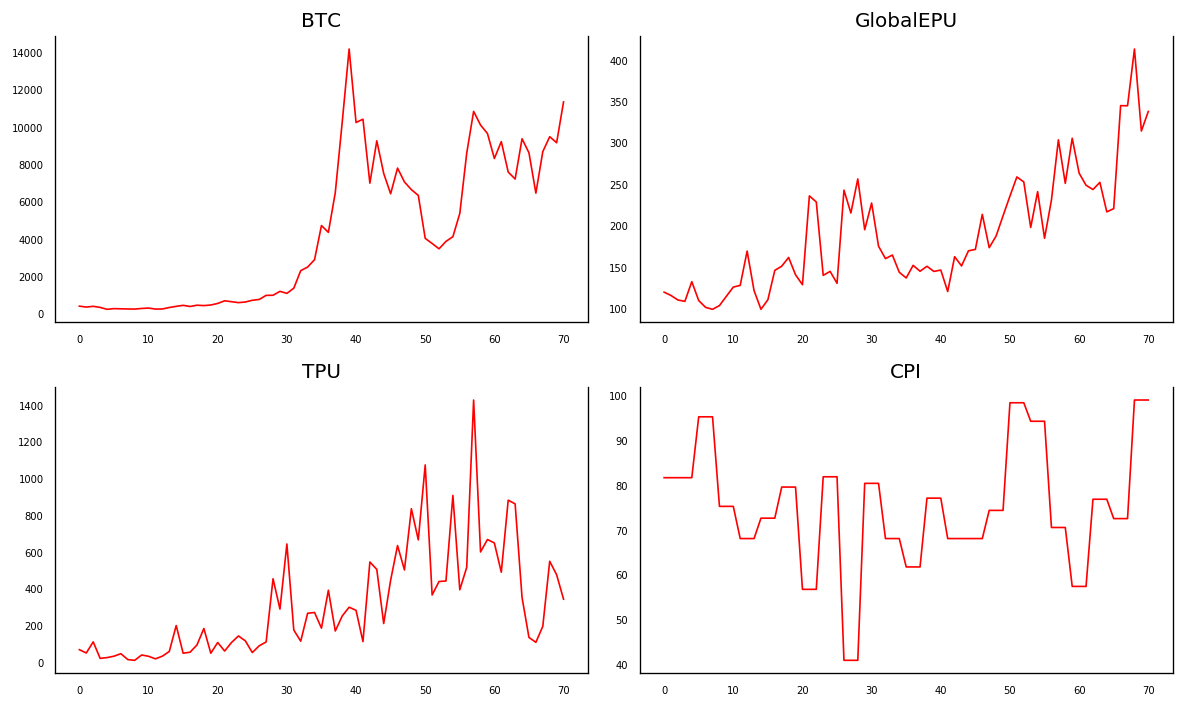

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 
dataset = gDf.loc[:,['BTC','GlobalEPU','TPU','CPI']]
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = dataset[dataset.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

# Convergent Cross Mapping

Convergent Cross Mapping (skccm) can be used as a way to detect causality between time series.

In [70]:
import skccm as ccm
import seaborn as sns

Let's make the data as stationary time series

In [65]:
dataset['GlobalEPU'] = np.diff(dataset['GlobalEPU'], prepend=dataset['GlobalEPU'][0])
dataset['BTC'] = np.diff(dataset['BTC'], prepend=dataset['BTC'][0])
dataset['TPU'] = np.diff(dataset['TPU'], prepend=dataset['TPU'][0])
dataset['CPI'] = np.diff(dataset['CPI'], prepend=dataset['CPI'][0])

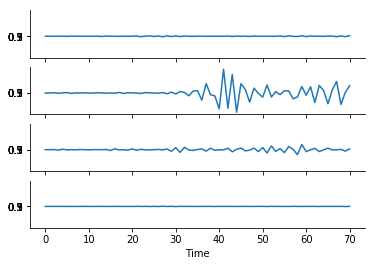

In [71]:
fig,ax = plt.subplots(nrows=4,sharex=True,sharey=True)

ax[0].plot(dataset['GlobalEPU'])
ax[1].plot(dataset['BTC'])
ax[2].plot(dataset['TPU'])
ax[3].plot(dataset['CPI'])
ax[0].set_yticks([.1,.3,.5,.7,.9])
ax[1].set_yticks([.1,.3,.5,.7,.9])
ax[2].set_yticks([.1,.3,.5,.7,.9])
ax[3].set_xlabel('Time')
sns.despine()

### Calculate the mutual information of the various indices

In [67]:
e1 = ccm.Embed(dataset['GlobalEPU'])
e2 = ccm.Embed(dataset['BTC'])
e3 = ccm.Embed(dataset['TPU'])
e4 = ccm.Embed(dataset['CPI'])

In [68]:
mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)
mi3 = e3.mutual_information(10)
mi4 = e4.mutual_information(10)

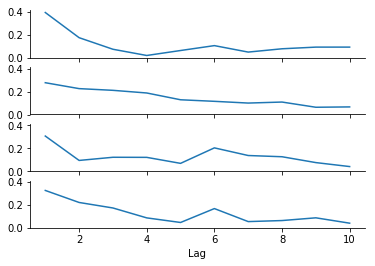

In [72]:
fig,ax = plt.subplots(nrows=4,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[2].plot(np.arange(1,11),mi3)
ax[3].plot(np.arange(1,11),mi4)
ax[3].set_xlabel('Lag')
sns.despine()

### Embedding the time series

In [73]:
lag = 1
embed = 2
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)
X3 = e1.embed_vectors_1d(lag,embed)
X4 = e2.embed_vectors_1d(lag,embed)

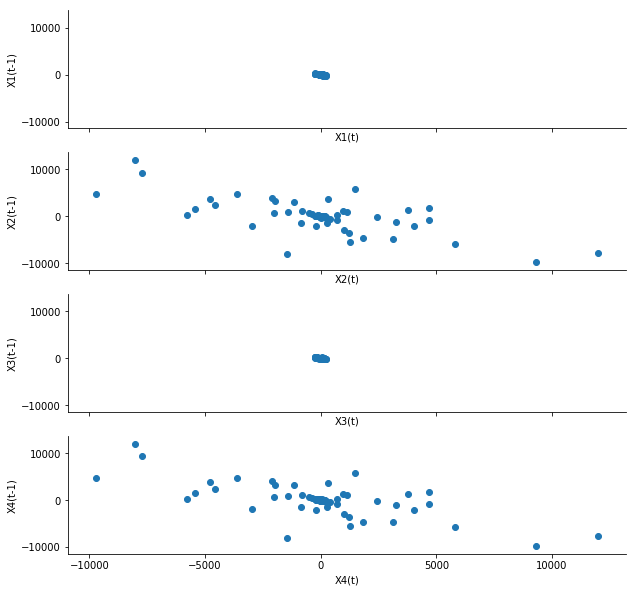

In [78]:
fig,ax = plt.subplots(nrows=4,sharey=True,sharex=True,figsize=(10,10)) 

ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[2].scatter(X1[:,0],X1[:,1])
ax[3].scatter(X2[:,0],X2[:,1])

ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
ax[2].set_xlabel('X3(t)')
ax[2].set_ylabel('X3(t-1)')
ax[3].set_xlabel('X4(t)')
ax[3].set_ylabel('X4(t-1)')

sns.despine()

Need to split data set to train and test

In [2]:
CCM.fit()

TypeError: fit() missing 3 required positional arguments: 'self', 'X1_train', and 'X2_train'

In [ ]:
CCM.predict()

CCM score will return two 2D array scores

In [ ]:
CCM.score() # corrcoef